# BOW 기반의 카운트 벡터 생성

NLTK가 제공하는 영화 리뷰

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('movie_reviews')

`movie_reviews`의 주요 함수

In [2]:
from nltk.corpus import movie_reviews

print('review count:', len(movie_reviews.fileids()))   # 영화 리뷰 문서의 id를 반환
print('samples of file ids:', movie_reviews.fileids()[:10])    # id를 10개까지만 출력
print('categories of reviews:', movie_reviews.categories())    # label, 즉 긍정인지 부정인지에 대한 분류
print('num of "neg" reviews:', len(movie_reviews.fileids(categories='neg')))   # label이 부정인 문서들의 id를 반환
print('num of "pos" reviews:', len(movie_reviews.fileids(categories='pos')))   # label이 긍정인 문서들의 id를 반환

# 첫 번째 문서
fileid = movie_reviews.fileids()[0]
print('id of the first review:', fileid)
print('first review content:\n', movie_reviews.raw(fileid)[:200])  # 첫 번째 문서의 내용을 200자까지만 출력
print()
print('sentence tokenization result:', movie_reviews.sents(fileid)[:2])    # 첫 번째 문서를 sentence tokenize한 결과 중 앞 두 문장
print('word tokenization result:', movie_reviews.words(fileid)[:20])   # 첫 번째 문서를 word tokenize한 결과 중 앞 스무 단어

review count: 2000
samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
categories of reviews: ['neg', 'pos']
num of "neg" reviews: 1000
num of "pos" reviews: 1000
id of the first review: neg/cv000_29416.txt
first review content:
 plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
w

sentence tokenization result: [['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.']]
word tokenization result: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'a

In [3]:
# 첫 번째 문서의 앞 50개 단어를 출력

documents = [list(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
print(documents[0][:50])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch']


**정규표현식 토큰화 & 불용어 제거**

In [ ]:
nltk.download('stopwords')

In [5]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer("[\w']{3,}")    # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english'))     # 영어 불용어사전을 가져옴

# words() 대신 raw()를 이용해 원문을 가져옴
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()] 

# stopwords의 적용과 토큰화를 동시에 수행
tokens = [[token for token in tokenizer.tokenize(doc) if token not in english_stops] for doc in documents]

# 단어의 빈도 수 카운트
word_count = {}
for text in tokens:
    for word in text:
        word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)  # 내림차순 정렬

print('num of features:', len(sorted_features))
for word in sorted_features[:10]:
    print(f"count of '{word}': {word_count[word]}", end=', ')

num of features: 43030
count of 'film': 8935, count of 'one': 5791, count of 'movie': 5538, count of 'like': 3690, count of 'even': 2564, count of 'time': 2409, count of 'good': 2407, count of 'story': 2136, count of 'would': 2084, count of 'much': 2049, 

**특성 집합 생성**

In [6]:
word_features = sorted_features[:1000] # 빈도가 높은 상위 1000개의 단어만 추출하여 features를 구성

**카운트 벡터 생성**

In [7]:
def document_features(document, word_features):
    word_count = {}
    for word in document:   # document에 있는 단어들에 대해 빈도수를 먼저 계산
        word_count[word] = word_count.get(word, 0) + 1
        
    features = []
    for word in word_features:      # word_features의 단어에 대해 계산된 빈도수를 feature에 추가
        features.append(word_count.get(word, 0))    # 빈도가 없는 단어는 0을 입력
    return features

In [8]:
feature_sets = [document_features(d, word_features) for d in tokens]

# 첫째 feature set의 내용을 앞 20개만 word_features의 단어와 함께 출력
for i in range(20):
    print(f'({word_features[i]}, {feature_sets[0][i]})', end=', ')

(film, 5), (one, 3), (movie, 6), (like, 3), (even, 3), (time, 0), (good, 2), (story, 0), (would, 1), (much, 0), (also, 1), (get, 3), (character, 1), (two, 2), (well, 1), (first, 0), (characters, 1), (see, 2), (way, 3), (make, 5), 

# 사이킷런을 이용한 카운트 벡터 생성

In [9]:
# data 준비, movie_reviews.raw()를 사용하여 raw text를 추출
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

"""
cv = CountVectorizer() # 모든 매개변수에 디폴트 값을 사용하는 경우
cv = CountVectorizer(max_features=1000) # 특성 집합을 지정하지 않고 최대 특성의 수를 지정하는 경우
"""
cv = CountVectorizer(vocabulary=word_features)  # 앞에서 생성한 word_features를 이용하여 특성 집합을 지정하는 경우

print(cv)   # 객체에 사용된 인수들을 확인

CountVectorizer(vocabulary=['film', 'one', 'movie', 'like', 'even', 'time',
                            'good', 'story', 'would', 'much', 'also', 'get',
                            'character', 'two', 'well', 'first', 'characters',
                            'see', 'way', 'make', 'life', 'really', 'films',
                            'plot', 'little', 'people', 'could', 'bad', 'scene',
                            'never', ...])


In [11]:
reviews_cv = cv.fit_transform(reviews)      # reviews를 이용하여 count vector를 학습하고, 변환
print(cv.get_feature_names_out()[:20])      # count vector에 사용된 feature 이름을 반환
print(word_features[:20])       # 비교를 위해 출력

['film' 'one' 'movie' 'like' 'even' 'time' 'good' 'story' 'would' 'much'
 'also' 'get' 'character' 'two' 'well' 'first' 'characters' 'see' 'way'
 'make']
['film', 'one', 'movie', 'like', 'even', 'time', 'good', 'story', 'would', 'much', 'also', 'get', 'character', 'two', 'well', 'first', 'characters', 'see', 'way', 'make']


DTM (Document Term Matrix) : 행은 문서, 열은 단어로 하여 단어의 빈도를 나타냔 행렬

In [12]:
print('type of count vectors:', type(reviews_cv))
print('shape of count vectors:', reviews_cv.shape)
print('sample of count vector:')
print(reviews_cv[0, :10])

#type of count vectors: <class 'scipy.sparse.csr.csr_matrix'>
#shape of count vectors: (2000, 1000)
#sample of count vector:
  (0, 0)	6
  (0, 1)	3
  (0, 2)	6
  (0, 3)	3
  (0, 4)	3
  (0, 6)	2
  (0, 8)	1


In [13]:
reviews_cv

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 252984 stored elements in Compressed Sparse Row format>

정규표현식 토크나이저와 `CounterVectorizer`의 토크나이저의 차이

In [14]:
print(feature_sets[0][:20])     # 앞에서 직접 계산한 카운트 벡터
print(reviews_cv.toarray()[0, :20])     # 변환된 결과의 첫째 feature set 중에서 앞 20개를 출력

[5, 3, 6, 3, 3, 0, 2, 0, 1, 0, 1, 3, 1, 2, 1, 0, 1, 2, 3, 5]
[6 3 6 3 3 0 2 0 1 0 1 3 2 2 1 0 1 2 3 5]


In [15]:
for word, count in zip(cv.get_feature_names_out()[:20], reviews_cv[0].toarray()[0, :20]):
    print(f'{word}:{count}', end=', ')

film:6, one:3, movie:6, like:3, even:3, time:0, good:2, story:0, would:1, much:0, also:1, get:3, character:2, two:2, well:1, first:0, characters:1, see:2, way:3, make:5, 

# 카운트 벡터의 활용

코사인 유사도(Cosine similarity)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [21]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

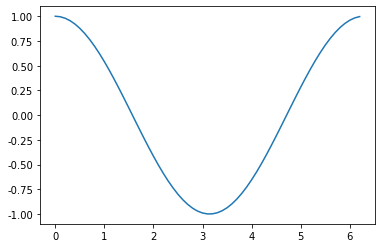

In [23]:
# 한 파장(2 PI)의 코사인 그래프

import numpy as np

x = np.arange(0,2*np.pi,0.1)   # start,stop,step
y = np.cos(x)

plt.plot(x, y)
plt.show()

단어별 빈도의 최솟값이 0이므로 벡터 간의 각도 차이가 90도를 넘어가지 않는다.
따라서, 두 벡터가 가장 가까우면 유사도는 1, 가장 멀면 0이 된다.

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

start = len(reviews[0]) // 2    # 첫째 리뷰의 문자수를 확인하고 뒤 절반을 가져오기 위해 중심점을 찾음
source = reviews[0][-start:]    # 중심점으로부터 뒤 절반을 가져와서 비교할 문서를 생성

source_cv = cv.transform([source])  # 코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
# transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력

print("대상 특성 행렬의 크기:", source_cv.shape)   # 행렬의 크기를 확인, 문서가 하나이므로 (1, 1000) -> 첫째 리뷰의 뒤 절반

sim_result = cosine_similarity(source_cv, reviews_cv)   # 변환된 count vector와 기존 값들과의 similarity 계산

print("유사도 계산 행렬의 크기:", sim_result.shape)
print("유사도 계산결과를 내림차순으로 정렬:", sorted(sim_result[0], reverse=True)[:10])

대상 특성 행렬의 크기: (1, 1000)
유사도 계산 행렬의 크기: (1, 2000)
유사도 계산결과를 내림차순으로 정렬: [0.8367205630128807, 0.43817531290756406, 0.4080451370075411, 0.40727044884302327, 0.4060219836225451, 0.3999621981759778, 0.39965783997760135, 0.39566661804603703, 0.3945302295079114, 0.3911637170821695]


첫번째 리뷰의 뒤 절반으로 전체 리뷰를 비교 하였으니 첫번째 리뷰와 가장 유사해야한다.

In [29]:
print('가장 유사한 리뷰의 인덱스:', np.argmax(sim_result[0]))

가장 유사한 리뷰의 인덱스: 0


In [30]:
print('가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result[0]).argsort()[:10])

가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1570  687  628  112 1712 1393  524 1740]


# TF-IDF로 성능향상

카운트 벡터 재사용시 `TfidfTransformer` 사용

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()

reviews_tf_T = transformer.fit_transform(reviews_cv)
print('shape of tfidf matrix:', reviews_tf_T.shape)    # TF-IDF 행렬의 모양과 카운트 행렬의 모양이 일치하는 것을 확인

# 첫번째 리뷰의 카운트 벡터 중 앞 20개 값 출력
print('첫번째 리뷰의 카운트 벡터 20개:', reviews_cv[0].toarray()[0][:20]) 
# 첫번째 리뷰의 TF-IDF 벡터 중 앞 20개 값 출력
print('첫번째 리뷰의 TF-IDF 벡터 20개:', reviews_tf_T[0].toarray()[0][:20])

shape of tfidf matrix: (2000, 1000)
첫번째 리뷰의 카운트 벡터 20개: [6 3 6 3 3 0 2 0 1 0 1 3 2 2 1 0 1 2 3 5]
첫번째 리뷰의 TF-IDF 벡터 20개: [0.13556199 0.06700076 0.14998642 0.0772298  0.08608998 0.
 0.0609124  0.         0.03126552 0.         0.03242315 0.09567082
 0.06575035 0.06518293 0.03225625 0.         0.0345017  0.06863314
 0.10042383 0.16727495]


In [43]:
source_tf_T = cv.transform([source])    # 코사인 유사도는 tf-idf 벡터에 대해 계산하므로 벡터로 변환

sim_result_tf_T = cosine_similarity(source_tf_T, reviews_tf_T)  # 변환된 tf-idf vector와 기존 값들과의 similarity 계산

print('가장 유사한 리뷰의 인덱스:', np.argmax(sim_result_tf_T[0]))

가장 유사한 리뷰의 인덱스: 0


처음부터 TF-IDF 벡터를 만들 때에는 `TfidfVectorizer` 사용

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(vocabulary=word_features)
reviews_tf_V = tf.fit_transform(reviews)

source_tf_V = tf.transform([source]) # 코사인 유사도는 tf-idf 벡터에 대해 계산하므로 벡터로 변환
#transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력

sim_result_tf_V = cosine_similarity(source_tf_V, reviews_tf_V)  # 변환된 count vector와 기존 값들과의 similarity 계산

print('가장 유사한 리뷰의 인덱스:', np.argmax(sim_result_tf_V[0]))

가장 유사한 리뷰의 인덱스: 0


각 벡터에 대한 유사도의 성능 차이 (일반적으로 TF-IDF가 높다)

In [45]:
print('카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result[0]).argsort()[:10])
print('카운트 벡터에서 변환한 TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result_tf_T[0]).argsort()[:10])
print('카운트 벡터를 쓰지 않은 TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result_tf_V[0]).argsort()[:10])

카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1570  687  628  112 1712 1393  524 1740]
카운트 벡터에서 변환한 TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1570 1393  787  628  647  511  771 1597]
카운트 벡터를 쓰지 않은 TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1393 1570  645  323 1143  628 1676 1391]
